In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the dataset
data = pd.read_excel('/content/Data Analysis.xlsx')
data1 = data.copy()
data.head(10)

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,61956,2019-06-29,0.838798,193.462005,230.6420,1,0,52.39,52.39,0.0,...,FORD,31,31,1,MANUAL,Scotland,Female,2018-10-01,2009-05-20,Silver
1,86265,2019-05-19,0.950820,711.545713,737.6796,1,0,130.10,130.10,0.0,...,VAUXHALL,22,20,0,MANUAL,South East,Female,2019-04-01,2014-04-01,Black
2,68310,2018-10-29,1.000000,501.245300,501.2453,1,0,0.00,0.00,0.0,...,MERCEDES-BENZ,55,55,1,AUTOMATIC,Wales,Female,2018-05-23,1997-09-25,Silver
3,83381,2018-11-30,1.000000,388.449700,388.4497,1,0,2029.95,2029.95,0.0,...,VOLKSWAGEN,33,33,1,AUTOMATIC,Yorkshire,Female,2016-02-01,2001-11-27,Black
4,70381,2018-05-01,1.000000,218.107300,218.1073,1,0,-61.00,-61.00,0.0,...,FORD,40,40,1,MANUAL,East Midlands,Female,2018-04-16,2009-04-16,Blue
5,56817,2019-04-13,1.000000,227.317900,224.2753,1,0,1355.39,1355.39,0.0,...,MAZDA,55,55,1,MANUAL,North West,Female,2018-04-01,1994-04-02,NaN
6,2563,2019-06-10,0.890710,757.515121,1031.9178,1,0,1169.81,1169.81,0.0,...,VOLKSWAGEN,27,27,1,MANUAL,East Anglia,Male,2019-06-04,2019-01-04,Grey
7,44810,2018-06-01,1.000000,187.784300,187.7843,1,0,140.00,140.00,0.0,...,TOYOTA,77,77,1,AUTOMATIC,East Midlands,Male,2017-06-01,1993-05-23,Silver
8,33407,2019-02-25,0.301370,631.275500,631.2755,1,0,601.70,601.70,0.0,...,RENAULT,35,35,1,MANUAL,North West,Male,2019-02-24,2001-02-24,Silver
9,99011,2018-05-07,1.000000,267.289700,271.3575,1,0,-192.00,-192.00,0.0,...,BMW,62,62,1,MANUAL,North West,Female,2016-02-01,1998-04-25,White


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7419 entries, 0 to 7418
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      7419 non-null   int64         
 1   start_date              7419 non-null   datetime64[ns]
 2   exposure                7419 non-null   float64       
 3   net_earned_premium      7419 non-null   float64       
 4   net_written_premium     7419 non-null   float64       
 5   claim_count             7419 non-null   int64         
 6   is_capped_incurred      7419 non-null   int64         
 7   incurred                7419 non-null   float64       
 8   capped_incurred         7419 non-null   float64       
 9   bi_incurred             7419 non-null   float64       
 10  ad_incurred             7419 non-null   float64       
 11  pd_incurred             7419 non-null   float64       
 12  th_incurred             7419 non-null   float64 

In [6]:
data.shape

(7419, 40)

In [7]:
#License Years

data['license_years'] = ((data['start_date'] - data['licence_test_date']).dt.days / 365).astype(int)
data = data.drop(["start_date","licence_test_date","vehicle_purchase_date"],axis=1)
data.head(5)

,id,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,ad_incurred,...,vehicle_age,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,primary_car_colour,license_years
0,61956,0.838798,193.462005,230.6420,1,0,52.39,52.39,0.0,-50.0,...,5,FORD,31,31,1,MANUAL,Scotland,Female,Silver,10
1,86265,0.950820,711.545713,737.6796,1,0,130.10,130.10,0.0,50.0,...,13,VAUXHALL,22,20,0,MANUAL,South East,Female,Black,5
2,68310,1.000000,501.245300,501.2453,1,0,0.00,0.00,0.0,0.0,...,11,MERCEDES-BENZ,55,55,1,AUTOMATIC,Wales,Female,Silver,21
3,83381,1.000000,388.449700,388.4497,1,0,2029.95,2029.95,0.0,-105.0,...,5,VOLKSWAGEN,33,33,1,AUTOMATIC,Yorkshire,Female,Black,17
4,70381,1.000000,218.107300,218.1073,1,0,-61.00,-61.00,0.0,-150.0,...,4,FORD,40,40,1,MANUAL,East Midlands,Female,Blue,9


In [8]:
# Hot Encoding
columns_to_encode = ['business_provider', 'cover','pncd' ,'vehicle_use', 'entitlement', 'overnight_location',
                     'vehicle_make', 'transmission', 'region', 'gender', 'primary_car_colour']
encoded_data = pd.get_dummies(data, columns = columns_to_encode)
#print(encoded_data.head())

In [9]:
print("Original DataFrame shape:", data.shape)
print("Encoded DataFrame shape:", encoded_data.shape)


Original DataFrame shape: (7419, 38)
Encoded DataFrame shape: (7419, 162)


In [10]:
df_corr = data.corr().transpose()
df_corr

,id,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,ad_incurred,...,ws_count,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,vehicle_age,d1_age,d1_residency_years,d1_is_uk_resident,license_years
id,1.000000,0.020384,0.012491,0.006247,0.002777,-0.002957,-0.005621,-0.007578,-0.004555,0.001193,...,0.007963,-0.005181,0.000215,-0.013603,-0.021043,0.016346,0.008333,0.003193,-0.008052,0.008338
exposure,0.020384,1.000000,0.202639,-0.106978,0.043565,-0.003262,-0.017512,-0.043658,-0.002703,-0.016792,...,0.056802,-0.003610,0.080394,0.080174,0.038701,-0.140659,0.007360,0.029985,0.061175,0.010606
net_earned_premium,0.012491,0.202639,1.000000,0.864889,0.103752,0.030616,0.108246,0.158078,0.064911,0.081938,...,-0.107553,0.109919,-0.497698,0.015422,0.062890,-0.027788,-0.434526,-0.441906,-0.109152,-0.466393
net_written_premium,0.006247,-0.106978,0.864889,1.000000,0.075875,0.029933,0.090813,0.141189,0.052880,0.058611,...,-0.118245,0.135377,-0.551793,-0.001898,0.051139,0.004540,-0.467264,-0.488153,-0.150788,-0.507925
claim_count,0.002777,0.043565,0.103752,0.075875,1.000000,0.003038,0.058222,0.126031,0.019396,0.061190,...,0.132428,-0.023118,-0.050536,0.011706,0.006179,-0.004965,-0.039443,-0.045808,-0.022058,-0.048295
is_capped_incurred,-0.002957,-0.003262,0.030616,0.029933,0.003038,1.000000,0.678508,0.345940,0.689871,0.116406,...,-0.014273,0.015412,-0.010633,0.010621,-0.000127,0.003337,-0.013817,-0.013824,-0.014970,-0.019930
incurred,-0.005621,-0.017512,0.108246,0.090813,0.058222,0.678508,1.000000,0.674109,0.947017,0.239686,...,-0.122950,0.020831,-0.065400,-0.008239,-0.003064,0.004641,-0.044959,-0.047586,-0.029521,-0.057459
capped_incurred,-0.007578,-0.043658,0.158078,0.141189,0.126031,0.345940,0.674109,1.000000,0.452913,0.477860,...,-0.239981,0.003765,-0.096283,0.001243,-0.018019,0.003132,-0.054711,-0.064615,-0.041202,-0.078201
bi_incurred,-0.004555,-0.002703,0.064911,0.052880,0.019396,0.689871,0.947017,0.452913,1.000000,0.033293,...,-0.043761,0.023153,-0.037404,-0.024990,-0.000655,0.015998,-0.033959,-0.030723,-0.013994,-0.037859
ad_incurred,0.001193,-0.016792,0.081938,0.058611,0.061190,0.116406,0.239686,0.477860,0.033293,1.000000,...,-0.192145,0.020212,-0.024416,0.147449,0.020084,-0.138159,-0.016826,-0.019889,-0.008906,-0.021695


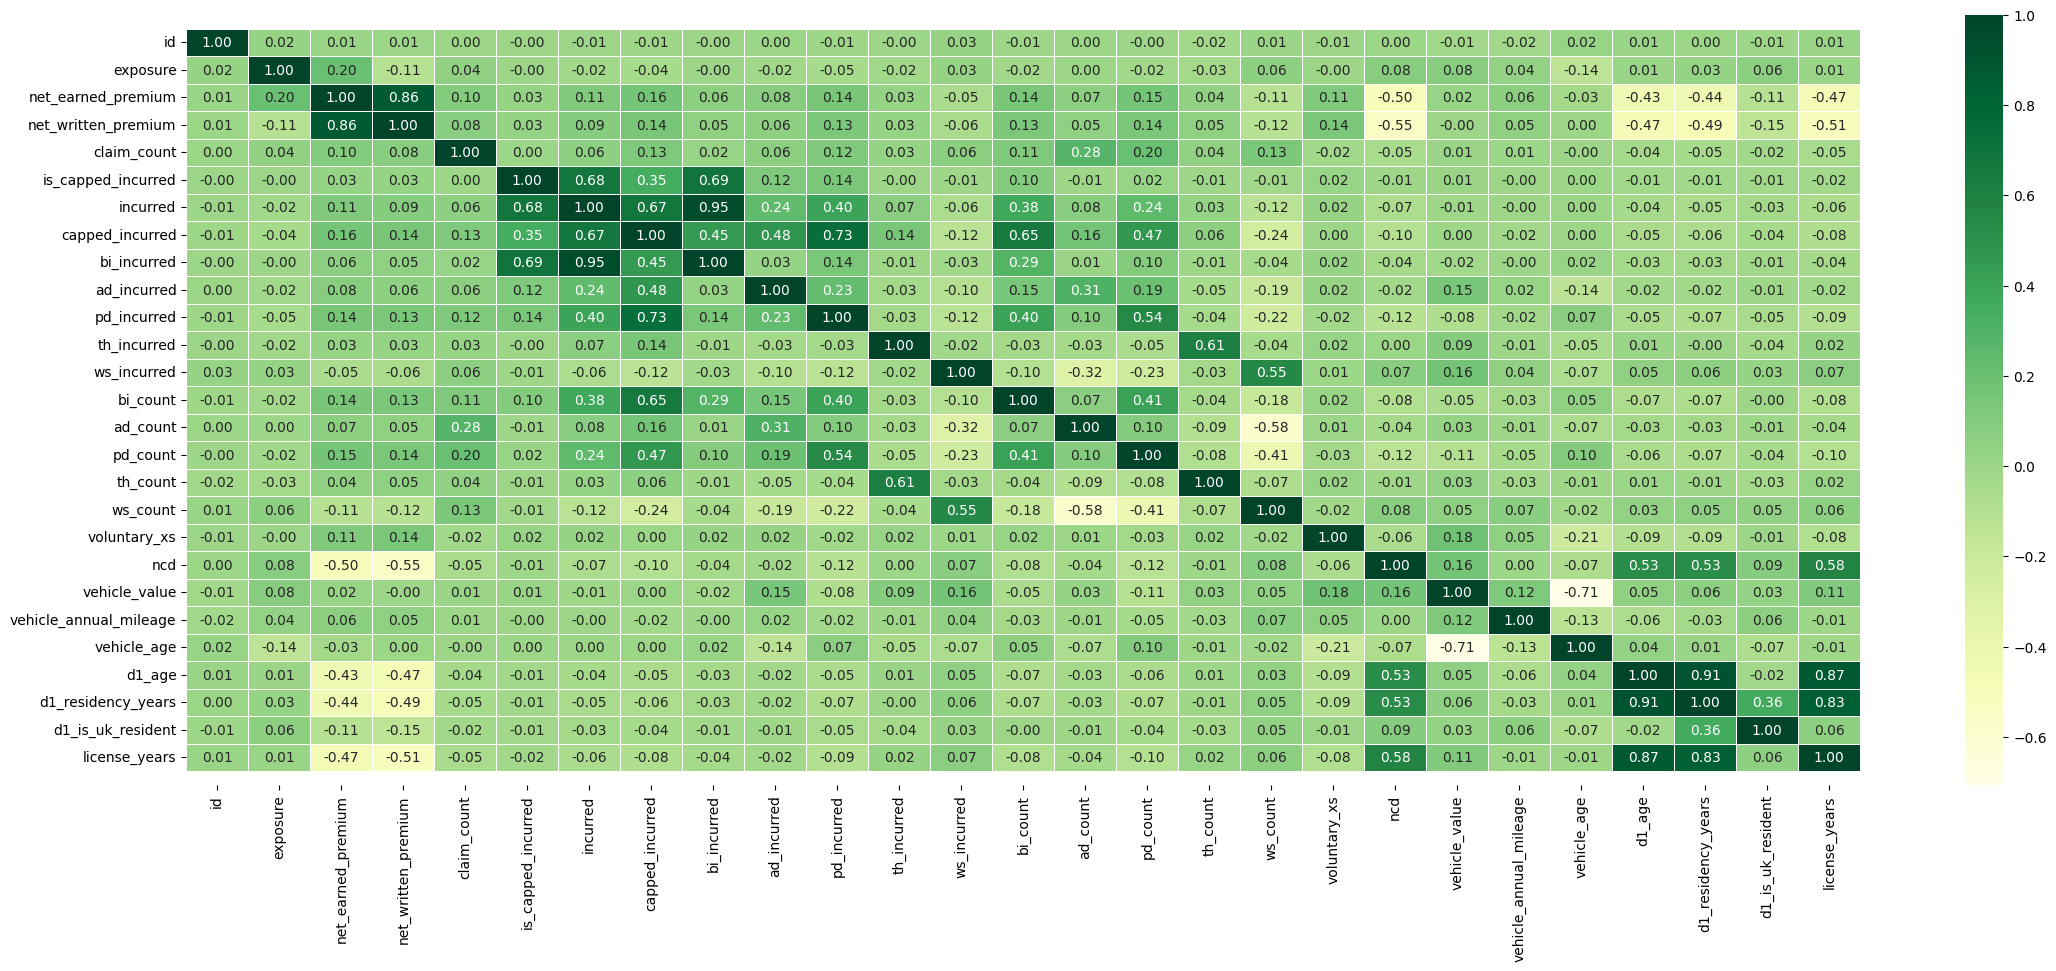

In [11]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(27, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [12]:
X = encoded_data.drop("capped_incurred",axis=1)   #Feature Matrix
y = encoded_data["capped_incurred"]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7419 entries, 0 to 7418
Columns: 161 entries, id to primary_car_colour_Yellow
dtypes: float64(9), int64(17), uint8(135)
memory usage: 2.4 MB


In [14]:
y

0          52.39
1         130.10
2           0.00
3        2029.95
4         -61.00
          ...   
7414      253.59
7415     1899.00
7416      580.00
7417      105.10
7418    11218.05
Name: capped_incurred, Length: 7419, dtype: float64

In [15]:
X.head()

,id,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,bi_incurred,ad_incurred,pd_incurred,...,primary_car_colour_Grey,primary_car_colour_Maroon,primary_car_colour_Orange,primary_car_colour_Pink,primary_car_colour_Purple,primary_car_colour_Red,primary_car_colour_Silver,primary_car_colour_Turquoise,primary_car_colour_White,primary_car_colour_Yellow
0,61956,0.838798,193.462005,230.6420,1,0,52.39,0.0,-50.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,86265,0.950820,711.545713,737.6796,1,0,130.10,0.0,50.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,68310,1.000000,501.245300,501.2453,1,0,0.00,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,83381,1.000000,388.449700,388.4497,1,0,2029.95,0.0,-105.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,70381,1.000000,218.107300,218.1073,1,0,-61.00,0.0,-150.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Checking for collinearity

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

11

In [18]:
corr_features


{'bi_incurred',
 'cover_TPFT',
 'd1_residency_years',
 'gender_Male',
 'license_years',
 'net_written_premium',
 'overnight_location_R',
 'pncd_Y',
 'transmission_MANUAL',
 'vehicle_age',
 'vehicle_use_S'}

In [19]:
X = X.drop(corr_features, axis = 1)

In [20]:
# Checking for features which have high relation with target variable

from sklearn.feature_selection import SelectKBest,mutual_info_regression
bestfeatures = SelectKBest(score_func=mutual_info_regression, k=10)
fit = bestfeatures.fit(X,y,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(10,'Score'))

          Feature     Score
5        incurred  5.995670
6     ad_incurred  2.148633
7     pd_incurred  0.756952
9     ws_incurred  0.721630
14       ws_count  0.394421
12       pd_count  0.285974
11       ad_count  0.207818
10       bi_count  0.170991
17  vehicle_value  0.118014
8     th_incurred  0.053317


In [21]:
X = X[['incurred','ad_incurred','pd_incurred','ws_incurred','ws_count',
       'pd_count','ad_count','bi_count','vehicle_value','voluntary_xs']]
X.head()

,incurred,ad_incurred,pd_incurred,ws_incurred,ws_count,pd_count,ad_count,bi_count,vehicle_value,voluntary_xs
0,52.39,-50.0,0.0,102.39,1,0,0,0,6895,0
1,130.10,50.0,0.0,80.10,1,0,0,0,2000,250
2,0.00,0.0,0.0,0.00,0,0,1,0,3000,250
3,2029.95,-105.0,0.0,0.00,0,0,0,0,10000,250
4,-61.00,-150.0,0.0,89.00,1,0,0,0,7245,150


In [22]:
# separate dataset into train and test
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((5193, 10), (2226, 10))

In [23]:
X_train

,incurred,ad_incurred,pd_incurred,ws_incurred,ws_count,pd_count,ad_count,bi_count,vehicle_value,voluntary_xs
5034,177.39,-105.0,0.00,282.39,1,0,0,0,13795,100
1450,100.00,100.0,0.00,0.00,0,0,1,0,7000,250
7164,-50.00,-50.0,0.00,0.00,0,1,0,0,6245,250
1528,-50.00,-50.0,0.00,0.00,0,1,0,0,4650,250
352,10904.55,50.0,3884.55,0.00,0,1,0,1,600,100
...,...,...,...,...,...,...,...,...,...,...
4931,102.39,0.0,0.00,102.39,1,0,0,0,7000,500
3264,1465.11,0.0,0.00,1465.11,1,0,0,0,3500,0
1653,157.39,55.0,0.00,102.39,1,0,0,0,4295,500
2607,7475.30,7475.3,0.00,0.00,0,0,1,0,9200,250


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
#Prediction on the Test Data

y_pred1 = lr.predict(X_test)
y_pred2 = gr.predict(X_test)
y_pred3 = rf.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual':y_test,'Linear Regression':y_pred1,'Gradient Boost':y_pred2,'Random Forest':y_pred3})
df

,Actual,Linear Regression,Gradient Boost,Random Forest
4194,2360.94,2461.474290,2310.767429,2360.6595
6911,80.10,86.911771,80.657620,80.1000
454,3756.31,3719.906468,3731.211953,3749.8807
6714,25.00,132.250604,24.032193,25.0000
152,202.00,5212.932546,191.396874,202.2089
...,...,...,...,...
4465,134.50,41.244291,135.194834,134.5000
4759,133.00,203.092502,133.566436,133.2116
5751,84.50,129.021811,82.598324,84.5000
5806,5883.07,5894.782169,5887.939880,5883.7129


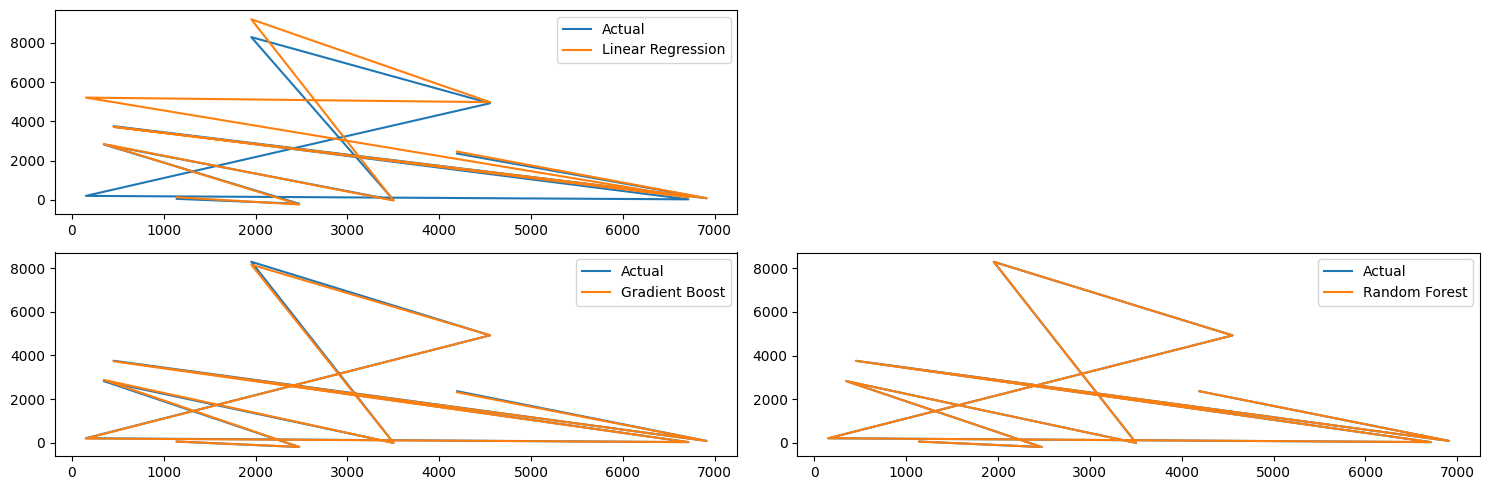

In [27]:
# Comparing the results from the Visual

plt.figure(figsize=(15, 5))


plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label="Actual")
plt.plot(df['Linear Regression'].iloc[0:11],label='Linear Regression')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label="Actual")
plt.plot(df['Gradient Boost'].iloc[0:11],label="Gradient Boost")
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11],label="Actual")
plt.plot(df['Random Forest'].iloc[0:11],label="Random Forest")
plt.legend()

plt.tight_layout()

In [28]:
# Finding out the R-Square
score1 = round(metrics.r2_score(y_test,y_pred1),4)
score2 = round(metrics.r2_score(y_test,y_pred2),4)
score3 = round(metrics.r2_score(y_test,y_pred3),4)

In [29]:
print(score1,score2,score3)

0.7998 0.9994 0.9994


In [30]:
# Adjusted R-Square

def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared value.

    Parameters:
    - y_true: array-like, true target values.
    - y_pred: array-like, predicted target values.
    - n_samples: int, number of samples in the dataset.
    - n_features: int, number of features used in the model.

    Returns:
    - adj_r_squared: float, adjusted R-squared value.
    """
    from sklearn.metrics import r2_score

    # Calculate the R-squared value
    r_squared = r2_score(y_true, y_pred)

    # Calculate the adjusted R-squared value
    adj_r_squared = 1 - ((1 - r_squared) * (n_samples - 1) / (n_samples - n_features - 1))

    return adj_r_squared


# y_test, y_pred1, y_pred2, y_pred3, y_pred4 are actual and predicted target values for each model
n_samples = len(y_test)
n_features = 10  # You need to replace YOUR_NUMBER_OF_FEATURES with the actual number of features used in your model

adj_score1 = round(adjusted_r_squared(y_test, y_pred1, n_samples, n_features), 4)
adj_score2 = round(adjusted_r_squared(y_test, y_pred2, n_samples, n_features), 4)
adj_score3 = round(adjusted_r_squared(y_test, y_pred3, n_samples, n_features), 4)

print("Adjusted R-squared scores:")
print("Model 1:", adj_score1)
print("Model 2:", adj_score2)
print("Model 3:", adj_score3)


Adjusted R-squared scores:
Model 1: 0.7989
Model 2: 0.9994
Model 3: 0.9994


In [31]:
# Finding the Mean Abolute Error
s1 = round(metrics.mean_absolute_error(y_test,y_pred1),4)
s2 = round(metrics.mean_absolute_error(y_test,y_pred2),4)
s3 = round(metrics.mean_absolute_error(y_test,y_pred3),4)
print(s1,s2,s3)

591.8862 25.9285 8.5861


In [32]:
# Root Mean Square Error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

rms_1 = round(root_mean_squared_error(y_test,y_pred1),4)
rms_2 = round(root_mean_squared_error(y_test,y_pred2),4)
rms_3 = round(root_mean_squared_error(y_test,y_pred3),4)
print(rms_1,rms_2,rms_3)

2394.517 127.3481 127.5798


In [33]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'R-squared': [0.7998, 0.9994, 0.9994],
    'Adjusted R-squared': [0.7989, 0.9994, 0.9994],
    'RMSE': [2394.517, 127.345, 127.2473],
    'MAE': [591.8862, 25.9172, 8.8082]
}

# Create DataFrame
df1 = pd.DataFrame(results)

# Set 'Model' column as index
df1.set_index('Model', inplace=True)

df1


,R-squared,Adjusted R-squared,RMSE,MAE
Model,,,,
Linear Regression,0.7998,0.7989,2394.5170,591.8862
Random Forest,0.9994,0.9994,127.3450,25.9172
Gradient Boosting,0.9994,0.9994,127.2473,8.8082
